In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Create a dataset for polynomial regression

In [4]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

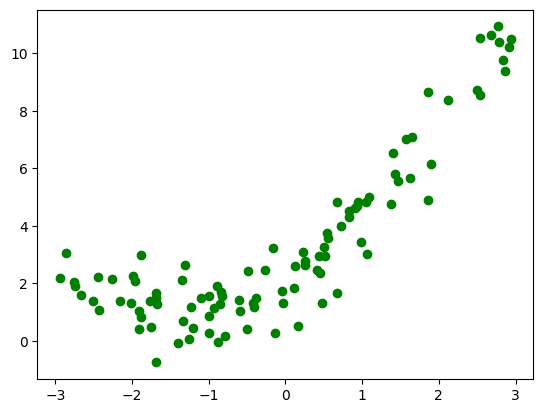

In [7]:
plt.scatter(X, y, color = 'g')

Now we will apply at first linear regression to check the error

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [10]:
regression.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression.predict(X_test))

In [12]:
score

0.5475597844489966

### visualize the model

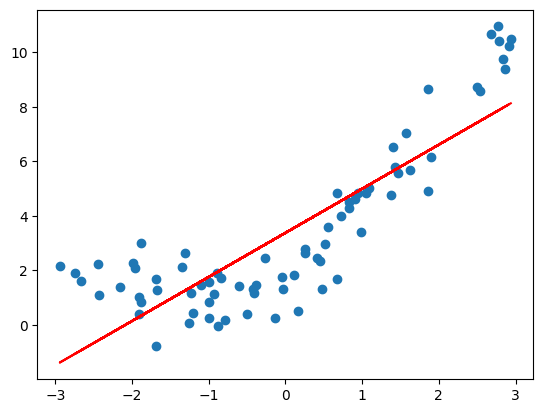

In [16]:
plt.plot(X_train, regression.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)

## Too much Error
now we need to think about polynomial regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
X_train_poly

array([[ 1.00000000e+00,  2.93828598e+00,  8.63352452e+00],
       [ 1.00000000e+00, -7.88996450e-01,  6.22515398e-01],
       [ 1.00000000e+00,  1.89257458e+00,  3.58183854e+00],
       [ 1.00000000e+00,  1.86251536e+00,  3.46896346e+00],
       [ 1.00000000e+00,  2.53602648e+00,  6.43143032e+00],
       [ 1.00000000e+00,  2.91087682e+00,  8.47320388e+00],
       [ 1.00000000e+00,  2.86686770e+00,  8.21893042e+00],
       [ 1.00000000e+00,  6.75289059e-01,  4.56015314e-01],
       [ 1.00000000e+00,  2.79004067e+00,  7.78432693e+00],
       [ 1.00000000e+00,  1.04462502e+00,  1.09124143e+00],
       [ 1.00000000e+00,  4.79553840e-01,  2.29971885e-01],
       [ 1.00000000e+00,  1.10829018e-01,  1.22830712e-02],
       [ 1.00000000e+00,  9.04460907e-01,  8.18049532e-01],
       [ 1.00000000e+00,  1.42769187e+00,  2.03830409e+00],
       [ 1.00000000e+00,  2.68619122e+00,  7.21562330e+00],
       [ 1.00000000e+00,  1.46694407e+00,  2.15192491e+00],
       [ 1.00000000e+00, -8.92089391e-01

In [22]:
regression1 = LinearRegression()
regression1.fit(X_train_poly, y_train)
y_predict = regression1.predict(X_test_poly)

score = r2_score(y_test, y_predict)
print(score)

0.904282323526164


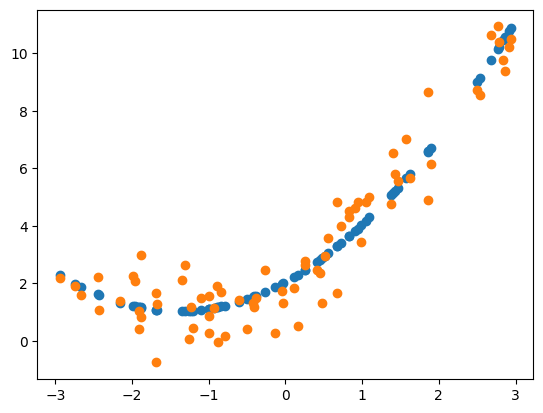

In [25]:
plt.scatter(X_train, regression1.predict(X_train_poly))
plt.scatter(X_train, y_train)